<a href="https://colab.research.google.com/github/lattarian/projeto_aplicado_iv/blob/main/projeto/cd_projeto_aplicado_IV_entrega_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  <img src="https://raw.githubusercontent.com/scalabrinig/cdProjetoAplicadoIV/d093146488f56dfcf0ef286bcee8efe0e71b9c76/figuras/mackenzie_logo.jpg" width="25%" align="right"/>

# **PROJETO APLICADO IV - Ciência de Dados EaD - 2025/02**


# **Entrega 4**

---

# **Título do Projeto**
---

In [ ]:
#@title **Identificação do Grupo**

#@markdown Integrantes do Grupo, nome completo em ordem alfabética (*informe: \<nome\>, \<matrícula\>*)
Aluno1 = 'Luis Fernando do Lago Attarian, 10089158' #@param {type:"string"}
Aluno2 = 'Kelly Graziely dos Santos Pena, 10416108' #@param {type:"string"}


# **Resumo**

Este projeto analisa a evolução da taxa de desocupação no Brasil entre 2012 e 2025, buscando responder ao problema de como crises econômicas, choques exógenos (como a pandemia de COVID-19) e períodos de recuperação afetam de forma persistente o mercado de trabalho e em que medida essas dinâmicas se alinham às metas do ODS 8, voltadas a trabalho decente e crescimento econômico. A relevância do estudo reside no fato de que o desemprego impacta diretamente renda, consumo, arrecadação e inclusão social, tornando indispensável uma leitura histórica e estrutural do indicador para subsidiar políticas públicas e decisões estratégicas. Metodologicamente, utiliza-se a série trimestral da PNAD Contínua (IBGE/SIDRA, tabela 4099) e técnicas de séries temporais, combinando análise exploratória (estatísticas descritivas e visualizações), decomposição STL (tendência, sazonalidade e resíduo) e diagnóstico ACF/PACF, com uso de modelos autorregressivos do tipo ARIMA para construir projeções exploratórias de curto prazo. Como produto, espera-se gerar um conjunto de painéis e indicadores interpretáveis — incluindo séries ajustadas sazonalmente, identificação de choques e comparação entre períodos críticos, capaz de apoiar a formulação e o monitoramento de políticas de emprego alinhadas à agenda do desenvolvimento sustentável.

# **Introdução**

A taxa de desocupação é um dos principais indicadores para compreender a dinâmica do mercado de trabalho e a estabilidade econômica do Brasil. Desde 2012, esse índice tem oscilado em resposta a crises, como a recessão de 2015–2016 e a pandemia de COVID-19, e a períodos de recuperação, como a expansão recente do emprego formal (IBGE, 2024; BRASIL, 2025). Em 2024, a taxa média de 6,6% atingiu o menor nível da série histórica, e em 2025 o índice recuou ainda mais para 5,8%, sinalizando avanços consistentes alinhados ao Objetivo de Desenvolvimento Sustentável 8 (ODS 8), que busca promover trabalho decente e crescimento econômico (NAÇÕES UNIDAS, 2023).

O projeto utiliza como base de dados a Pesquisa Nacional por Amostra de Domicílios Contínua (PNAD Contínua), realizada pelo IBGE, que disponibiliza a taxa de desocupação com periodicidade trimestral, abrangendo todas as Unidades da Federação e permitindo comparações regionais. Trata-se de uma fonte oficial, padronizada e amplamente utilizada em estudos acadêmicos e formulação de políticas públicas, o que garante confiabilidade e relevância às análises.

O objetivo geral é analisar a evolução da taxa de desocupação no Brasil entre 2012 e 2025 por meio de técnicas de séries temporais, identificando tendências, padrões sazonais e impactos de eventos econômicos. Especificamente, busca-se organizar e explorar os microdados da PNAD Contínua, construir representações gráficas que evidenciem ciclos e rupturas, decompor a série temporal em tendência, sazonalidade e ruído, comparar períodos críticos, avaliar disparidades regionais e relacionar os resultados às metas do ODS 8.

A escolha da taxa de desocupação justifica-se por sua centralidade na dinâmica econômica e social: o desemprego afeta renda, consumo, arrecadação e inclusão social. Ao mesmo tempo, a análise histórica e comparativa permite gerar subsídios para políticas públicas e decisões estratégicas, reforçando a importância de alinhar evidências quantitativas a objetivos sociais mais amplos, como os definidos pela ONU.

# **Referencial Teórico**

A taxa de desocupação mede a proporção de pessoas economicamente ativas que buscam trabalho, mas não encontram ocupação, sendo um dos principais indicadores de desempenho macroeconômico e social (IBGE, 2024). Esse indicador reage diretamente às oscilações do ciclo econômico, às crises e às políticas públicas de estímulo ao emprego (BARROS; CORSEUIL, 2021). Estudos sobre o mercado de trabalho brasileiro mostram que períodos de recessão e eventos inesperados, como a pandemia de COVID-19, provocam elevações expressivas nas taxas de desemprego, seguidas de recuperações graduais, o que reflete a rigidez estrutural e a inércia desse mercado (FIRPO; GONZAGA; MONTEIRO, 2022). Assim, compreender a dinâmica temporal da desocupação requer o uso de modelos estatísticos capazes de capturar tendências, sazonalidades e padrões cíclicos, permitindo tanto a análise descritiva quanto a previsão de cenários futuros (CARVALHO; MOREIRA, 2020).

A análise de séries temporais é uma abordagem consolidada na estatística e na econometria, cujo objetivo é identificar dependências temporais e padrões de comportamento nos dados observados ao longo do tempo (BOX; JENKINS; REINSEL; LJUNG, 2016). Entre os modelos tradicionais, destacam-se os modelos autorregressivos integrados de médias móveis (ARIMA), que assumem que o valor atual de uma variável depende linearmente de seus valores passados e de termos de erro (CHATFIELD, 2003). Esses modelos são eficientes em séries estacionárias e bem comportadas, mas apresentam limitações quando há mudanças estruturais abruptas, como as observadas em períodos de crise econômica (CARVALHO; MOREIRA, 2020). Nesses casos, a decomposição aditiva da série — separando-a em tendência, sazonalidade e resíduo — oferece uma leitura mais interpretável dos componentes subjacentes ao fenômeno (HARVEY, 1990; HYNDMAN; ATHANASOPOULOS, 2018).

A técnica STL (Seasonal-Trend decomposition using Loess), proposta e popularizada por Cleveland et al. (1990) e recomendada por Hyndman e Athanasopoulos (2018), utiliza regressão local para decompor séries temporais de forma robusta e flexível, permitindo que os componentes sazonais mudem de forma ao longo do tempo. No contexto da taxa de desocupação brasileira, a aplicação do STL permite identificar uma tendência de longo prazo associada às fases de crescimento e recessão da economia, bem como uma sazonalidade leve e estável, relacionada a flutuações típicas do mercado de trabalho entre trimestres — como a queda no desemprego no final do ano e o aumento no início do ciclo anual. A análise da componente residual, por sua vez, evidencia choques transitórios como o aumento abrupto da desocupação em 2020, durante a pandemia, e a posterior normalização gradual (SILVA; PORSSE, 2021).

Complementarmente, o uso dos gráficos de autocorrelação (ACF) e autocorrelação parcial (PACF) permite investigar a presença de dependência temporal e identificar a estrutura autorregressiva da série. A ACF mede a correlação entre o valor atual e seus atrasos (lags), enquanto a PACF identifica as correlações diretas com cada defasagem, removendo a influência intermediária (BOX et al., 2016). Em séries econômicas, é comum observar altos valores de autocorrelação nos primeiros lags, o que indica persistência temporal e dependência de curto prazo. Esse padrão foi identificado também na série da taxa de desocupação do Brasil, sugerindo um comportamento compatível com um modelo autorregressivo de primeira ordem (AR(1)), em que o valor atual é fortemente influenciado pelo trimestre anterior (CARVALHO; MOREIRA, 2020; HYNDMAN; ATHANASOPOULOS, 2018). Quando há tendência, a diferenciação da série torna o processo estacionário, conduzindo ao modelo ARIMA(1,1,0), adequado para representar séries que exibem inércia e ajuste lento, como o desemprego (HARVEY, 1990; CHATFIELD, 2003).

Essa persistência temporal revela uma memória longa do mercado de trabalho: aumentos ou reduções na taxa de desocupação tendem a se propagar ao longo de vários trimestres, refletindo tanto o ritmo lento de criação de empregos quanto o tempo necessário para que políticas de estímulo produzam efeito (BARROS; CORSEUIL, 2021). A leve sazonalidade observada, por outro lado, reforça a ideia de que o componente cíclico tem impacto marginal frente à tendência estrutural, predominando fatores macroeconômicos de longo prazo (FIRPO; GONZAGA; MONTEIRO, 2022). O diagnóstico ACF/PACF corrobora essa interpretação, mostrando que a taxa de desocupação apresenta alta autocorrelação positiva de curto prazo e ausência de picos sazonais marcantes, o que reforça o caráter gradual e persistente das variações no emprego.

Pesquisas recentes destacam que a combinação de métodos clássicos de séries temporais e técnicas modernas de aprendizado de máquina melhora a capacidade preditiva e interpretativa das análises econômicas (SANTOS; PORSSE, 2022). No caso da decomposição STL, sua capacidade de isolar componentes e revelar comportamentos não lineares torna-a uma ferramenta poderosa para comunicação de resultados a gestores públicos e formulação de políticas de emprego. Em âmbito global, organismos internacionais como a Organização Internacional do Trabalho (ILO, 2023) e a Organização das Nações Unidas (NAÇÕES UNIDAS, 2023) reforçam a importância de acompanhar continuamente o desemprego, dentro da agenda do ODS 8 – Trabalho decente e crescimento econômico, como forma de orientar políticas sustentáveis de geração de emprego e renda.

Em síntese, o uso combinado das abordagens STL e ACF/PACF oferece uma compreensão mais profunda da dinâmica da taxa de desocupação, permitindo identificar simultaneamente a estrutura de longo prazo, as variações sazonais e a força de dependência temporal do fenômeno. Essa abordagem se mostra adequada para contextos macroeconômicos complexos como o brasileiro, pois alia robustez estatística, clareza interpretativa e relevância empírica, contribuindo para análises que podem apoiar decisões estratégicas em políticas públicas e planejamento econômico.


# **Diagrama de Solução**


1) Coleta (SIDRA/IBGE – PNAD Contínua, t.4099)
Recuperamos a taxa de desocupação para Brasil e UFs via API (2012–2025, frequência trimestral). Mantemos metadados de período (código e rótulo) para rastreabilidade.

2) Padronização temporal e estrutural
Convertemos o código do período (ex.: 201201) em ano, trimestre, periodo (Q-DEC) e data (1º mês do trimestre). Uniformizamos os atributos (local, cod_local, ano, trimestre, periodo, data, valor) e ordenamos as observações por tempo e local. (Opcional: grade trimestral completa, sem imputação.)

3) EDA (analítica e gráfica)
Estatísticas descritivas e visualizações para entender o fenômeno:
* Série temporal do Brasil;
* Boxplot por trimestre (sazonalidade);
* Comparações entre UFs (médias e volatilidade);
* Comparação entre períodos macroeconômicos (pré-crise, crise, pandemia, recuperação).
Essa etapa gera os “achados” iniciais e hipóteses para a modelagem.

4) Decomposição STL (tendência, sazonalidade, resíduo)
Usamos STL (period=4) para separar a série em componentes e obter a série ajustada sazonalmente (valor_aj_sazonal). Entregas: colunas stl_trend, stl_season e valor_aj_sazonal, que permitem comparar níveis sem viés sazonal e quantificar a amplitude da sazonalidade.

5) Diagnóstico ACF/PACF
Aplicamos ACF/PACF na série ajustada (e, se necessário, nas versões diferenciadas Δ1/Δ4) para avaliar memória temporal e sinais sazonais residuais.

Resultado esperado desta etapa: um notebook com dados padronizados, painéis EDA, componentes STL e gráficos/tabelas ACF/PACF, prontos para alimentar a análise final e futuras projeções exploratórias, alinhadas ao ODS 8.

## **Visão geral**

[ Coleta ] → [ Padronização ] → [ EDA ] → [ Decomposição STL ] → [ Diagnóstico ACF/PACF ] → [ Comparação entre UFs ]  → [ Síntese dos Achados ]

# **EDA e Pré-processamento dos dados**



## **Coleta e organização**

## Setup e coleta (SIDRA/IBGE – Tabela 4099)

In [1]:
import requests
import pandas as pd

# URLs (tabela 4099, variável 4099 = taxa de desocupação)
# n1/all = Brasil; n3/all = UFs
URL_BRASIL = "https://apisidra.ibge.gov.br/values/t/4099/n1/all/v/4099/p/all?formato=json"
URL_UF     = "https://apisidra.ibge.gov.br/values/t/4099/n3/all/v/4099/p/all?formato=json"

HEADERS = {"Accept": "application/json"}

def load_sidra_json(url: str) -> pd.DataFrame:
    r = requests.get(url, headers=HEADERS, timeout=60)
    r.raise_for_status()
    data = r.json()
    return pd.DataFrame(data)

# Carregar datasets
df_brasil_raw = load_sidra_json(URL_BRASIL)
df_uf_raw = load_sidra_json(URL_UF)

print("Brasil (raw) — amostra:")
display(df_brasil_raw.head())
print(df_brasil_raw.dtypes)
print("\nUFs (raw) — amostra:")
display(df_uf_raw.head())
print(df_uf_raw.dtypes)

Brasil (raw) — amostra:


,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Variável (Código),Variável,Trimestre (Código),Trimestre
1,1,Brasil,2,%,8.0,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201201,1º trimestre 2012
2,1,Brasil,2,%,7.6,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201202,2º trimestre 2012
3,1,Brasil,2,%,7.1,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201203,3º trimestre 2012
4,1,Brasil,2,%,6.9,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201204,4º trimestre 2012


NC     object
NN     object
MC     object
MN     object
V      object
D1C    object
D1N    object
D2C    object
D2N    object
D3C    object
D3N    object
dtype: object

UFs (raw) — amostra:


,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Unidade da Federação (Código),Unidade da Federação,Variável (Código),Variável,Trimestre (Código),Trimestre
1,3,Unidade da Federação,2,%,8.1,11,Rondônia,4099,"Taxa de desocupação, na semana de referência, ...",201201,1º trimestre 2012
2,3,Unidade da Federação,2,%,6.3,11,Rondônia,4099,"Taxa de desocupação, na semana de referência, ...",201202,2º trimestre 2012
3,3,Unidade da Federação,2,%,5.9,11,Rondônia,4099,"Taxa de desocupação, na semana de referência, ...",201203,3º trimestre 2012
4,3,Unidade da Federação,2,%,5.2,11,Rondônia,4099,"Taxa de desocupação, na semana de referência, ...",201204,4º trimestre 2012


NC     object
NN     object
MC     object
MN     object
V      object
D1C    object
D1N    object
D2C    object
D2N    object
D3C    object
D3N    object
dtype: object


## Descrição inicial (atributos e observações)

In [ ]:
# Descrição Brasil
print("=== Brasil (Tabela 4099) ===")
print("Número de observações (linhas):", len(df_brasil_raw))
print("Atributos (colunas):", list(df_brasil_raw.columns))
print("\nTipos de dados:")
print(df_brasil_raw.dtypes)

# Descrição UFs
print("\n=== UFs (Tabela 4099) ===")
print("Número de observações (linhas):", len(df_uf_raw))
print("Atributos (colunas):", list(df_uf_raw.columns))
print("\nTipos de dados:")
print(df_uf_raw.dtypes)

descricao_colunas = {
    "NC": "Nível de cobertura dos dados (geralmente não usado diretamente).",
    "D1C": "Código da 1ª dimensão (ex.: Brasil=1 ou código da UF).",
    "D1N": "Nome da 1ª dimensão (ex.: Brasil, São Paulo).",
    "D2C": "Código da 2ª dimensão (período).",
    "D2N": "Nome do período (ex.: 2012 1º trimestre, 2025 2º trimestre).",
    "V":   "Valor da variável selecionada (neste caso, taxa de desocupação em %)."
}

print("\n=== Dicionário de colunas (presentes nos DataFrames) ===")
for col, desc in descricao_colunas.items():
    if col in df_brasil_raw.columns or col in df_uf_raw.columns:
        print(f"{col}: {desc}")

=== Brasil (Tabela 4099) ===
Número de observações (linhas): 55
Atributos (colunas): ['NC', 'NN', 'MC', 'MN', 'V', 'D1C', 'D1N', 'D2C', 'D2N', 'D3C', 'D3N']

Tipos de dados:
NC     object
NN     object
MC     object
MN     object
V      object
D1C    object
D1N    object
D2C    object
D2N    object
D3C    object
D3N    object
dtype: object

=== UFs (Tabela 4099) ===
Número de observações (linhas): 1459
Atributos (colunas): ['NC', 'NN', 'MC', 'MN', 'V', 'D1C', 'D1N', 'D2C', 'D2N', 'D3C', 'D3N']

Tipos de dados:
NC     object
NN     object
MC     object
MN     object
V      object
D1C    object
D1N    object
D2C    object
D2N    object
D3C    object
D3N    object
dtype: object

=== Dicionário de colunas (presentes nos DataFrames) ===
NC: Nível de cobertura dos dados (geralmente não usado diretamente).
D1C: Código da 1ª dimensão (ex.: Brasil=1 ou código da UF).
D1N: Nome da 1ª dimensão (ex.: Brasil, São Paulo).
D2C: Código da 2ª dimensão (período).
D2N: Nome do período (ex.: 2012 1º trime

# Padronização

## Limpeza e padronização (funções auxiliares)

In [3]:
import re

def parse_periodo_from_cod(cod):
    """
    Recebe cod_periodo no padrão SIDRA (p.ex. '201201' = 1º tri/2012).
    Retorna (ano, trimestre, Period('YYYYQn','Q-DEC'), data_timestamp).
    - Se vier mensal (01..12), mapeia mês -> trimestre.
    - Retorna None se não conseguir interpretar.
    """
    if pd.isna(cod):
        return None
    s = str(cod).strip()
    s = "".join(re.findall(r"\d+", s))  # só dígitos

    if len(s) < 5:
        return None

    ano = int(s[:4])
    resto = s[4:]  # '01'..'04' (trimestre) ou '01'..'12' (mês)

    # Interpretação do resto
    try:
        x = int(resto)
    except ValueError:
        return None

    if 1 <= x <= 4:
        tri = x
    elif 1 <= x <= 12:
        tri = (x - 1) // 3 + 1  # mês -> trimestre
    else:
        return None

    periodo = pd.Period(f"{ano}Q{tri}", freq="Q-DEC")
    start_month = {1: 1, 2: 4, 3: 7, 4: 10}[tri]
    data_ts = pd.Timestamp(year=ano, month=start_month, day=1)
    return ano, tri, periodo, data_ts

def coerce_valor(v):
    if pd.isna(v):
        return pd.NA
    # Garantir float (SIDRA costuma vir com ponto; mas tratamos vírgula se aparecer)
    return float(str(v).replace(",", "."))

## Transformar Brasil (tidy: atributos/observações)

In [4]:
# Manter apenas as colunas relevantes
cols_keep = ["D1C", "D1N", "D3C", "D3N", "V"]
df_brasil = df_brasil_raw.loc[:, [c for c in cols_keep if c in df_brasil_raw.columns]].copy()

# 1) Remover a linha de cabeçalho do SIDRA (onde V == "Valor")
if "V" in df_brasil.columns:
    df_brasil = df_brasil[df_brasil["V"] != "Valor"].copy()

# 2) Renomear para padrão
df_brasil = df_brasil.rename(columns={
    "D1C": "cod_local",
    "D1N": "local",
    "D3C": "cod_periodo",
    "D3N": "periodo_nome",
    "V":   "valor"
})

# 3) Converter 'valor' para float (coerção segura)
df_brasil["valor"] = (
    df_brasil["valor"]
    .astype(str).str.strip().str.replace(",", ".", regex=False)
)
df_brasil["valor"] = pd.to_numeric(df_brasil["valor"], errors="coerce")

# 4) Extrair ano, trimestre, Period e data
parsed = df_brasil["cod_periodo"].apply(parse_periodo_from_cod)
df_brasil["ano"] = parsed.apply(lambda x: x[0])
df_brasil["trimestre"] = parsed.apply(lambda x: x[1])
df_brasil["periodo"] = parsed.apply(lambda x: x[2])
df_brasil["data"] = parsed.apply(lambda x: x[3])

# 5) Ordenar e tipar
df_brasil = (
    df_brasil.dropna(subset=["periodo"])
             .sort_values(["ano", "trimestre"])
             .reset_index(drop=True)
)

print("Brasil (tidy) — amostra:")
display(df_brasil.head())
print(df_brasil.dtypes)

Brasil (tidy) — amostra:


,cod_local,local,cod_periodo,periodo_nome,valor,ano,trimestre,periodo,data
0,1,Brasil,201201,1º trimestre 2012,8.0,2012,1,2012Q1,2012-01-01
1,1,Brasil,201202,2º trimestre 2012,7.6,2012,2,2012Q2,2012-04-01
2,1,Brasil,201203,3º trimestre 2012,7.1,2012,3,2012Q3,2012-07-01
3,1,Brasil,201204,4º trimestre 2012,6.9,2012,4,2012Q4,2012-10-01
4,1,Brasil,201301,1º trimestre 2013,8.0,2013,1,2013Q1,2013-01-01


cod_local               object
local                   object
cod_periodo             object
periodo_nome            object
valor                  float64
ano                      int64
trimestre                int64
periodo          period[Q-DEC]
data            datetime64[ns]
dtype: object


## Transformar UFs (tidy, com uf_sigla quando disponível no nome)

In [5]:
df_uf = df_uf_raw.loc[:, [c for c in cols_keep if c in df_uf_raw.columns]].copy()
df_uf = df_uf.rename(columns={
    "D1C": "cod_local",
    "D1N": "local",
    "D3C": "cod_periodo",
    "D3N": "periodo_nome",
    "V":   "valor"
})

# 1) Remover a linha de cabeçalho do SIDRA (onde V == "Valor")
if "V" in df_uf.columns:
    df_uf = df_uf[df_uf["V"] != "Valor"].copy()

# 3) Converter 'valor' para float (coerção segura)
df_uf["valor"] = (
    df_uf["valor"]
    .astype(str).str.strip().str.replace(",", ".", regex=False)
)
df_uf["valor"] = pd.to_numeric(df_uf["valor"], errors="coerce")

def _safe_parse(cod):
    out = parse_periodo_from_cod(cod)

    return out if isinstance(out, tuple) else (pd.NA, pd.NA, pd.NaT, pd.NaT)

# Extração de ano/trimestre/period/data
parsed_uf = df_uf["cod_periodo"].apply(_safe_parse)

df_uf["ano"] = parsed_uf.apply(lambda x: x[0])
df_uf["trimestre"] = parsed_uf.apply(lambda x: x[1])
df_uf["periodo"] = parsed_uf.apply(lambda x: x[2])
df_uf["data"] = parsed_uf.apply(lambda x: x[3])


df_uf = df_uf.dropna(subset=["periodo"]).sort_values(["local","ano","trimestre"]).reset_index(drop=True)

print("UFs (tidy) — amostra:")
display(df_uf.head(10))
print(df_uf.dtypes)

UFs (tidy) — amostra:


,cod_local,local,cod_periodo,periodo_nome,valor,ano,trimestre,periodo,data
0,12,Acre,201201,1º trimestre 2012,9.2,2012,1,2012Q1,2012-01-01
1,12,Acre,201202,2º trimestre 2012,9.0,2012,2,2012Q2,2012-04-01
2,12,Acre,201203,3º trimestre 2012,7.7,2012,3,2012Q3,2012-07-01
3,12,Acre,201204,4º trimestre 2012,8.2,2012,4,2012Q4,2012-10-01
4,12,Acre,201301,1º trimestre 2013,10.9,2013,1,2013Q1,2013-01-01
5,12,Acre,201302,2º trimestre 2013,9.5,2013,2,2013Q2,2013-04-01
6,12,Acre,201303,3º trimestre 2013,8.9,2013,3,2013Q3,2013-07-01
7,12,Acre,201304,4º trimestre 2013,7.0,2013,4,2013Q4,2013-10-01
8,12,Acre,201401,1º trimestre 2014,8.1,2014,1,2014Q1,2014-01-01
9,12,Acre,201402,2º trimestre 2014,9.7,2014,2,2014Q2,2014-04-01


cod_local               object
local                   object
cod_periodo             object
periodo_nome            object
valor                  float64
ano                     object
trimestre               object
periodo          period[Q-DEC]
data            datetime64[ns]
dtype: object


**Figura 1 – Estruturação da série trimestral da taxa de desocupação**

## Análise Exploratória de Dados (analítica e gráfica)

In [6]:
# EDA — (0) Seleção das bases e garantias de tipo (sem DeprecationWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Usa versões com qualidade (qc) se existirem; caso contrário, usa as padronizadas
dfB = globals().get("df_brasil")
dfU = globals().get("df_uf")

if dfB is None or dfU is None:
    raise NameError("Não encontrei df_brasil/df_uf Execute as etapas anteriores.")


print("Bases prontas para EDA:", dfB.shape, dfU.shape)

Bases prontas para EDA: (55, 9) (1485, 9)


**Estatísticas descritivas — Brasil**

In [7]:
# EDA — (1) Estatísticas descritivas — Brasil
print("=== EDA — Brasil (estatísticas descritivas) ===")
display(dfB[["valor"]].describe())

=== EDA — Brasil (estatísticas descritivas) ===


,valor
count,55.000000
mean,9.785455
std,2.776917
min,5.600000
25%,7.300000
50%,9.000000
75%,12.100000
max,14.900000


**Estatísticas por trimestre — Brasil (sazonalidade)**

In [8]:
# EDA — (2) Estatísticas por trimestre — Brasil
if "trimestre" in dfB.columns:
    saz_brasil = (dfB.groupby("trimestre")["valor"]
                    .agg(["count","mean","std","min","max"])
                    .rename_axis("trimestre")
                    .reset_index())
    print("Brasil — estatísticas por trimestre:")
    display(saz_brasil)
else:
    print("Coluna 'trimestre' ausente em dfB.")

Brasil — estatísticas por trimestre:


,trimestre,count,mean,std,min,max
0,1,14,10.300000,2.755414,7.0,14.9
1,2,14,9.814286,2.892658,5.8,14.2
2,3,14,9.585714,2.965405,5.6,14.9
3,4,13,9.415385,2.716568,6.2,14.2


**Série temporal — Brasil (linha + média móvel 4T)**

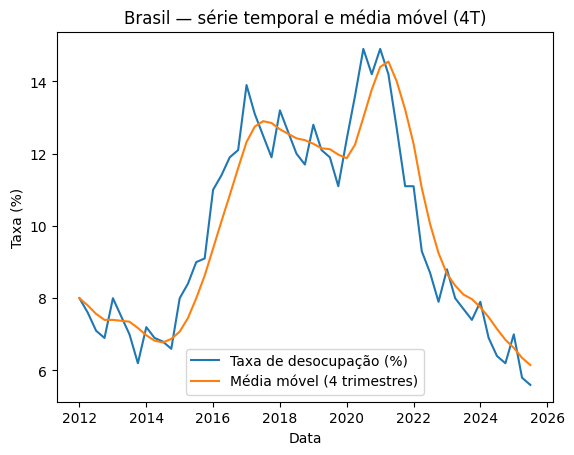

In [25]:
# EDA — (3) Série temporal — Brasil (linha + média móvel 4T)
dfB_ord = dfB.sort_values("data").copy()
dfB_ord["mm_4tr"] = dfB_ord["valor"].rolling(4, min_periods=1).mean()

plt.figure()
plt.plot(dfB_ord["data"], dfB_ord["valor"], label="Taxa de desocupação (%)")
plt.plot(dfB_ord["data"], dfB_ord["mm_4tr"], label="Média móvel (4 trimestres)")
plt.title("Brasil — série temporal e média móvel (4T)")
plt.xlabel("Data")
plt.ylabel("Taxa (%)")
plt.legend()
plt.savefig("figura_2_brasil_mm4t.png", dpi=300, bbox_inches="tight")
plt.show()

**Figura 2 – Série temporal e média móvel de 4 trimestres (Brasil)**

**Sazonalidade — Boxplot por trimestre (Brasil)**

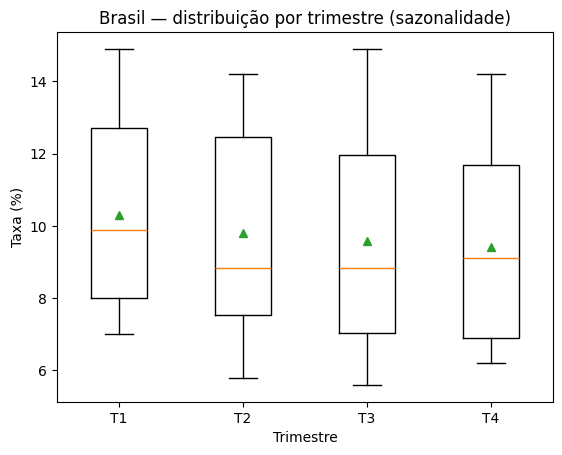

In [10]:
if "trimestre" in dfB.columns:
    ordem = [1, 2, 3, 4]
    # Só usa trimestres que existem e têm dados
    trimestres_presentes = [t for t in ordem if (dfB["trimestre"] == t).any()]
    dados_box = [dfB.loc[dfB["trimestre"] == t, "valor"].dropna().values for t in trimestres_presentes]
    # Evita erro se algum trimestre vier vazio
    dados_box = [arr for arr in dados_box if arr.size > 0]
    if len(dados_box) == 0:
        print("Sem dados suficientes para boxplot por trimestre.")
    else:
        plt.figure()
        plt.boxplot(dados_box, tick_labels=[f"T{t}" for t in trimestres_presentes], showmeans=True)
        plt.title("Brasil — distribuição por trimestre (sazonalidade)")
        plt.xlabel("Trimestre"); plt.ylabel("Taxa (%)"); plt.show()
else:
    print("Coluna 'trimestre' ausente em dfB.")

**Figura 3 – Boxplot da taxa de desocupação por trimestre**

**UFs — estatísticas agregadas (média, mediana, desvio, n)**

In [11]:
# EDA — (6) UFs — estatísticas agregadas
uf_stats = (dfU.groupby("local")["valor"]
              .agg(media="mean", mediana="median", desvio="std", n="count")
              .reset_index()
              .dropna(subset=["media"]))
print("UFs — estatísticas agregadas (amostra):")
display(uf_stats.head())

UFs — estatísticas agregadas (amostra):


,local,media,mediana,desvio,n
0,Acre,10.987273,9.8,3.307906,55
1,Alagoas,13.023636,11.7,3.745563,55
2,Amapá,13.836364,14.1,3.685978,55
3,Amazonas,11.672727,10.5,3.118015,55
4,Bahia,14.520000,14.4,3.580575,55


**UFs — Top 10 maiores médias (gráfico)**

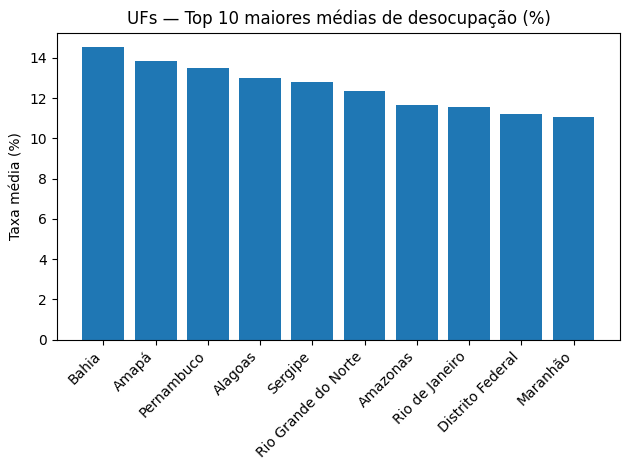

In [12]:
top10_media = uf_stats.sort_values("media", ascending=False).head(10)
plt.figure()
plt.bar(top10_media["local"], top10_media["media"])
plt.title("UFs — Top 10 maiores médias de desocupação (%)")
plt.xticks(rotation=45, ha="right"); plt.ylabel("Taxa média (%)"); plt.tight_layout(); plt.show()

**Figura 4 – Médias da taxa de desocupação por UF**

**UFs — Top 10 maior volatilidade (desvio-padrão)**

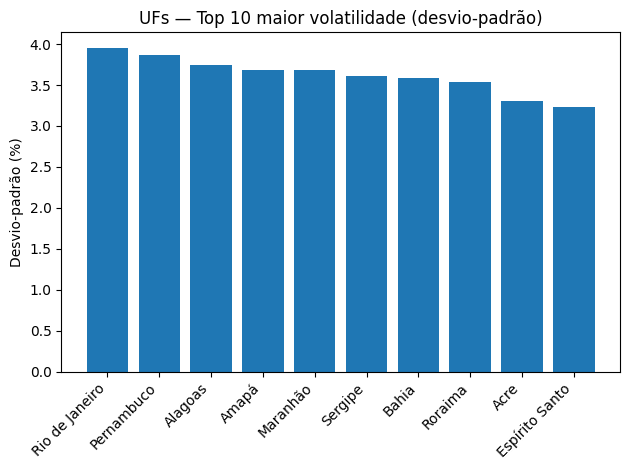

In [13]:
top10_vol = uf_stats.sort_values("desvio", ascending=False).head(10)
plt.figure()
plt.bar(top10_vol["local"], top10_vol["desvio"])
plt.title("UFs — Top 10 maior volatilidade (desvio-padrão)")
plt.xticks(rotation=45, ha="right"); plt.ylabel("Desvio-padrão (%)"); plt.tight_layout(); plt.show()

**Série temporal de top 5 estados com maiores médias**

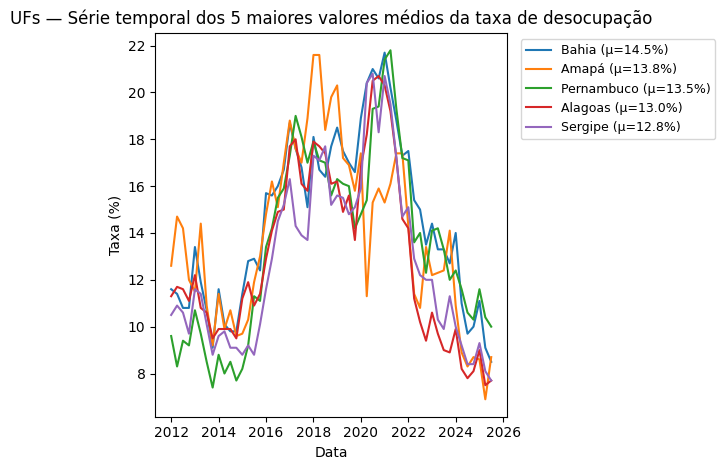

,media_%
local,
Bahia,14.52
Amapá,13.84
Pernambuco,13.50
Alagoas,13.02
Sergipe,12.78


In [14]:
# Calcula médias por UF e seleciona top-5
uf_means = (dfU.groupby("local", as_index=False)["valor"]
              .mean()
              .dropna(subset=["valor"])
              .rename(columns={"valor": "media"}))

top5_locs = (uf_means.sort_values("media", ascending=False)
                        .head(5)["local"].tolist())

# Ordena as UFs selecionadas pela média (desc) para plotar em ordem consistente
ordem_top5 = (uf_means.set_index("local")
                        .loc[top5_locs, "media"]
                        .sort_values(ascending=False))

# Filtra dados das UFs top-5 e ordena por tempo
gdf = (dfU[dfU["local"].isin(ordem_top5.index)]
       .dropna(subset=["valor", "data"])
       .sort_values("data"))

plt.figure()
for uf in ordem_top5.index:
    s = gdf[gdf["local"] == uf]
    if s.empty:
        continue
    plt.plot(s["data"], s["valor"], label=f"{uf} (μ={s['valor'].mean():.1f}%)")

plt.title("UFs — Série temporal dos 5 maiores valores médios da taxa de desocupação")
plt.xlabel("Data")
plt.ylabel("Taxa (%)")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=9)  # legenda fora para não poluir
plt.tight_layout()
plt.show()

# Tabela auxiliar das top-5 médias (para referência)
display(ordem_top5.rename("media_%").round(2).to_frame())

**Figura 5 – Trajetórias temporais das UFs com maior média**

**Comparação entre períodos — Brasil (pré-crise, crise, pandemia, recuperação)**

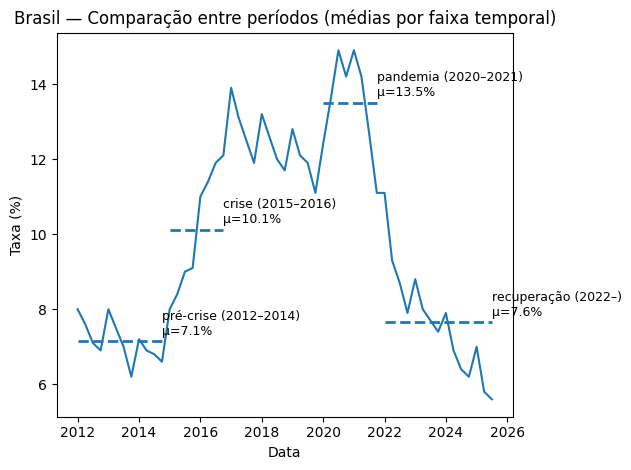

In [15]:
# ===============================
# Gráfico temporal — Comparação entre períodos (Brasil)
# Pré-crise, Crise, Pandemia, Recuperação
# ===============================
import pandas as pd
import matplotlib.pyplot as plt

# Usa a base com qualidade, se existir; senão, a padronizada
dfB = globals().get("df_brasil")
if dfB is None:
    raise NameError("Não encontrei df_brasil. Execute as etapas anteriores.")

# Garantias mínimas
dfB = dfB.copy()
dfB["data"]  = pd.to_datetime(dfB["data"], errors="coerce")
dfB["valor"] = pd.to_numeric(dfB["valor"], errors="coerce")

# Garante 'periodo' como Period (Q-DEC)
if "periodo" not in dfB.columns:
    raise KeyError("Coluna 'periodo' ausente em dfB. Garanta a padronização temporal previamente.")
if not isinstance(getattr(dfB["periodo"], "dtype", None), pd.PeriodDtype):
    dfB["periodo"] = pd.PeriodIndex(dfB["periodo"].astype(str), freq="Q-DEC")

# Define períodos
def _p(y, q):  # Period trimestral
    return pd.Period(f"{y}Q{q}", freq="Q-DEC")

pmax = dfB["periodo"].max()
periodos = {
    "pré-crise (2012–2014)": (_p(2012,1), _p(2014,4)),
    "crise (2015–2016)":     (_p(2015,1), _p(2016,4)),
    "pandemia (2020–2021)":  (_p(2020,1), _p(2021,4)),
    "recuperação (2022–)":   (_p(2022,1), pmax),
}

# Série temporal
dfB_ord = dfB.sort_values("data")

plt.figure()
plt.plot(dfB_ord["data"], dfB_ord["valor"], label="Brasil — taxa de desocupação (%)")
plt.title("Brasil — Comparação entre períodos (médias por faixa temporal)")
plt.xlabel("Data"); plt.ylabel("Taxa (%)")

# Linhas horizontais de média por período, com rótulos
for nome, (ini, fim) in periodos.items():
    mask = (dfB_ord["periodo"] >= ini) & (dfB_ord["periodo"] <= fim)
    sub = dfB_ord.loc[mask, ["data", "valor"]].dropna()
    if sub.empty:
        continue
    ymean = sub["valor"].mean()
    x0, x1 = sub["data"].min(), sub["data"].max()

    # Segmento horizontal da média do período
    plt.hlines(ymean, xmin=x0, xmax=x1, linestyles="--", linewidth=2)

    yoff = (dfB_ord["valor"].max() - dfB_ord["valor"].min()) * 0.01
    plt.text(x1, ymean + yoff, f"{nome}\nμ={ymean:.1f}%", va="bottom", ha="left", fontsize=9)

plt.tight_layout()
plt.show()

## Análise dos dados empregados: qualidade, estrutura, limitações e recortes adotados

Os dados foram padronizados e estruturados para garantir consistência temporal e comparabilidade entre períodos e regiões. O código do período foi convertido em colunas explícitas de ano, trimestre, período e data, permitindo ordenação cronológica correta e o uso de funções de janela e modelagem. Essa transformação é ilustrada na Figura 1 – Estruturação da série trimestral da taxa de desocupação, em que a base é organizada em formato longo, com as colunas principais local, ano, trimestre e valor, sem imputação de lacunas, preservando a integridade dos dados originais.

Os dados da PNAD Contínua (IBGE) apresentam alta qualidade e continuidade temporal, sem valores ausentes ou outliers relevantes. Figura 2 – Série temporal e média móvel de 4 trimestres da taxa de desocupação – Brasil, 2012–2025, evidencia uma trajetória coerente: aumento da desocupação na crise de 2015–2016, pico durante a pandemia (2020–2021) e queda gradual no período de recuperação (2022–2025), confirmando a plausibilidade econômica da série.

A análise da sazonalidade (ver Figura 3 – Boxplot da taxa de desocupação por trimestre) mostrou variações suaves entre trimestres, com médias próximas (T1 ≈ 10,3% e T4 ≈ 9,4%). O boxplot indica sazonalidade leve, sugerindo que a tendência de longo prazo é o principal componente da série. As disparidades regionais são evidenciadas nas figuras seguintes: a Figura 4 – Médias da taxa de desocupação por UF destaca Bahia, Amapá e Pernambuco como estados com maiores taxas médias (cerca de 13–15%), enquanto a Figura 5 – Trajetórias temporais das UFs com maior média mostra que Rio de Janeiro e Pernambuco apresentam maior volatilidade, refletindo instabilidade conjuntural e possível dependência de setores mais sensíveis ao ciclo econômico.

Foram adotadas simplificações metodológicas para manter o foco exploratório: análise apenas da taxa de desocupação agregada, sem desagregações por sexo, idade ou escolaridade, e uso de ferramentas descritivas e de decomposição (média móvel e STL) em vez de modelos paramétricos completos (como SARIMA). Essas escolhas, ilustradas ao longo das figuras de EDA, priorizam clareza interpretativa em detrimento de maior complexidade modelística.

Entre as limitações, destacam-se o erro amostral da PNAD (mais relevante em estados de menor população), a periodicidade trimestral (que suaviza choques muito rápidos) e a ausência de variáveis explicativas externas (como PIB, inflação ou políticas públicas específicas). Ainda assim, as evidências apresentadas nas figuras de EDA indicam que se trata de uma base robusta, pública e representativa, adequada para análises exploratórias do mercado de trabalho e para apoiar etapas posteriores de modelagem temporal e projeções alinhadas ao ODS 8.

# **Modelos**

## Seasonal-Trend decomposition using Loess

A decomposição da série temporal foi realizada utilizando o método STL (Seasonal-Trend Decomposition using Loess), aplicado à taxa trimestral de desocupação do Brasil (2012–2025). O STL permite decompor uma série temporal em três componentes fundamentais: tendência, sazonalidade e resíduo, fornecendo uma visão clara das variações estruturais e cíclicas do fenômeno ao longo do tempo. Foi adotado um período sazonal de 4 trimestres, correspondente à frequência anual.

O procedimento envolveu os seguintes passos:

1. Interpolação e regularização temporal: assegurou que os intervalos fossem
trimestrais e contínuos, condição necessária para o ajuste do modelo.

2. Aplicação do STL: separando a série original em componentes independentes — trend (tendência), season (sazonalidade) e resid (resíduo).

3. Construção da série ajustada sazonalmente: obtida subtraindo a componente sazonal do valor original (valor_aj_sazonal = valor - stl_season).

4. Visualização e validação: os gráficos compararam a série original e a ajustada, permitindo avaliar a influência e estabilidade das oscilações sazonais.

**Brasil — Decomposição STL + série ajustada sazonalmente**

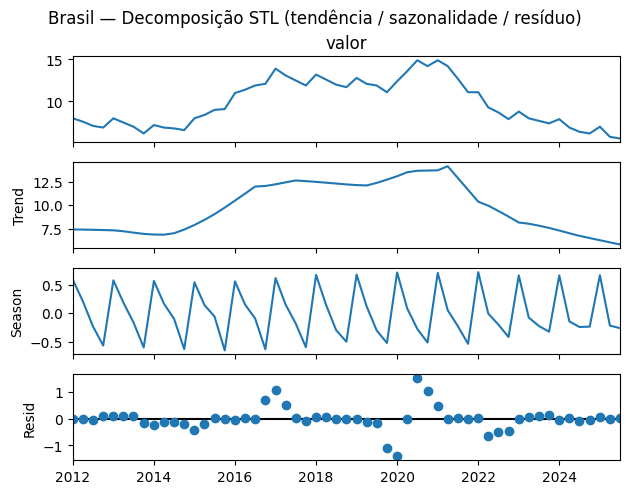

Componentes STL gravados em df_brasil: ['stl_trend', 'stl_season', 'valor_aj_sazonal']


,cod_local,local,cod_periodo,periodo_nome,valor,ano,trimestre,periodo,data,stl_trend,stl_season,valor_aj_sazonal
50,1,Brasil,202403,3º trimestre 2024,6.4,2024,3,2024Q3,2024-07-01,6.743915,-0.240994,6.640994
51,1,Brasil,202404,4º trimestre 2024,6.2,2024,4,2024Q4,2024-10-01,6.508425,-0.234984,6.434984
52,1,Brasil,202501,1º trimestre 2025,7.0,2025,1,2025Q1,2025-01-01,6.276982,0.664579,6.335421
53,1,Brasil,202502,2º trimestre 2025,5.8,2025,2,2025Q2,2025-04-01,6.049623,-0.216563,6.016563
54,1,Brasil,202503,3º trimestre 2025,5.6,2025,3,2025Q3,2025-07-01,5.825513,-0.261130,5.861130


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

dfB = globals().get("df_brasil_qc", globals().get("df_brasil"))
dfU = globals().get("df_uf_qc",     globals().get("df_uf"))

if dfB is None:
    raise NameError("Não encontrei df_brasil/df_brasil_qc. Execute as etapas anteriores.")


dfB = dfB.copy()
dfB["data"]  = pd.to_datetime(dfB.get("data", pd.NaT), errors="coerce")
dfB["valor"] = pd.to_numeric(dfB["valor"], errors="coerce")

SEASONAL_PERIOD = 4  # trimestral

# STL — (2) Brasil — Decomposição e ajuste sazonal
# Seleciona a série do Brasil (se 'local' existir)
if "local" in dfB.columns:
    sB = (dfB[dfB["local"].str.contains("Brasil", case=False, na=False)]
            .sort_values("data")
            .set_index("data")["valor"])
    if sB.empty:
        sB = dfB.sort_values("data").set_index("data")["valor"]
else:
    sB = dfB.sort_values("data").set_index("data")["valor"]

# Garante frequência regular trimestral para o input do STL
sB = sB.asfreq("QS")  # início de trimestre

sB_input = sB.interpolate(limit_direction="both")

stl = STL(sB_input, period=SEASONAL_PERIOD, robust=True)
res = stl.fit()

# Componentes
trend = pd.Series(res.trend, index=sB.index, name="stl_trend")
season = pd.Series(res.seasonal, index=sB.index, name="stl_season")
resid = pd.Series(res.resid, index=sB.index, name="stl_resid")

# Série ajustada sazonalmente: original - componente sazonal
s_aj = (sB - season).rename("valor_aj_sazonal")

# Plota decomposição (1 figura própria)
fig = res.plot()
fig.suptitle("Brasil — Decomposição STL (tendência / sazonalidade / resíduo)", y=1.02)
plt.show()


target_name =  "df_brasil"
_target = globals().get(target_name).copy()

_target["data"] = pd.to_datetime(_target["data"], errors="coerce")
_target = _target.sort_values("data")

# Merge por data
_target = (_target.merge(trend.rename("stl_trend"), left_on="data", right_index=True, how="left")
                  .merge(season.rename("stl_season"), left_on="data", right_index=True, how="left")
                  .merge(s_aj, left_on="data", right_index=True, how="left"))

globals()[target_name] = _target  # atualiza no ambiente

print(f"Componentes STL gravados em {target_name}: ['stl_trend', 'stl_season', 'valor_aj_sazonal']")
display(_target.tail())

**Gráfico — Brasil: original × ajustado sazonalmente**

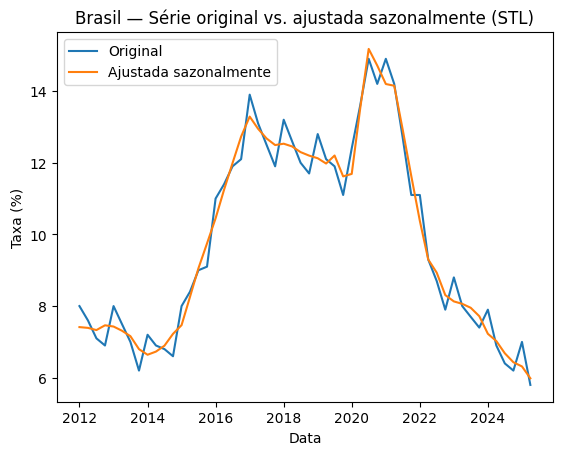

In [ ]:
# STL — (4) Gráfico — Brasil: original vs. ajustado sazonalmente
dfB_plot = globals().get("df_brasil").copy()
dfB_plot["data"] = pd.to_datetime(dfB_plot["data"], errors="coerce")
dfB_plot = dfB_plot.sort_values("data")

plt.figure()
plt.plot(dfB_plot["data"], dfB_plot["valor"], label="Original")
if "valor_aj_sazonal" in dfB_plot.columns:
    plt.plot(dfB_plot["data"], dfB_plot["valor_aj_sazonal"], label="Ajustada sazonalmente")
plt.title("Brasil — Série original vs. ajustada sazonalmente (STL)")
plt.xlabel("Data"); plt.ylabel("Taxa (%)"); plt.legend(); plt.show()

**Gráfico — componente sazonal do Brasil**

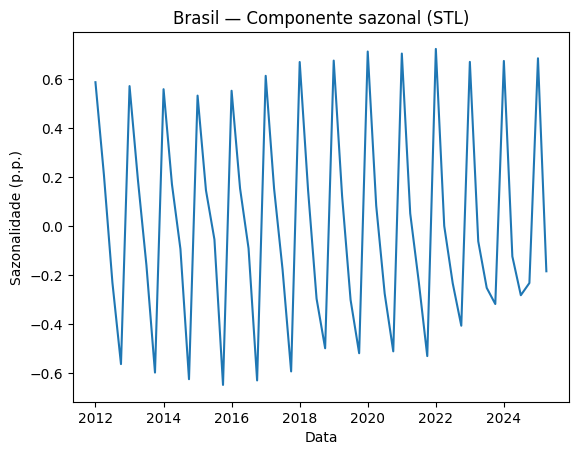

In [ ]:
dfB_comp = globals().get("df_brasil").copy()
dfB_comp["data"] = pd.to_datetime(dfB_comp["data"], errors="coerce")
dfB_comp = dfB_comp.sort_values("data")
plt.figure()
plt.plot(dfB_comp["data"], dfB_comp["stl_season"])
plt.title("Brasil — Componente sazonal (STL)")
plt.xlabel("Data"); plt.ylabel("Sazonalidade (p.p.)"); plt.show()


## ACF e PACF

O procedimento consistiu em:

1. Conversão e ordenação temporal: a coluna data foi transformada para o formato de data e a série ordenada cronologicamente.

2. Cálculo da ACF e PACF:

* A ACF (Autocorrelation Function) mede a correlação da série com suas defasagens (lags), indicando o quanto o valor atual depende de períodos anteriores.

* A PACF (Partial Autocorrelation Function) mostra o impacto direto de cada defasagem após remover a influência das intermediárias.

3. Comparação entre a série original e a ajustada sazonalmente: avaliou-se o comportamento antes e depois da remoção da sazonalidade, para verificar se os padrões de correlação mudam.

Os gráficos apresentam, no eixo x, as defasagens trimestrais (lags) e, no eixo y, os coeficientes de correlação entre -1 e 1. A faixa azul representa o **intervalo de confiança de 95%**.

**ACF e PACF — série original e ajustada sazonalmente**

<Figure size 640x480 with 0 Axes>

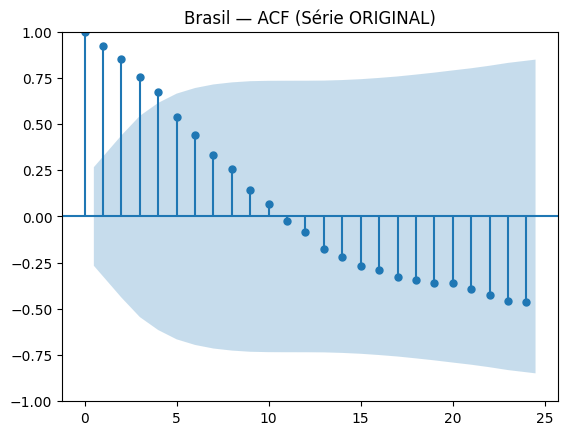

<Figure size 640x480 with 0 Axes>

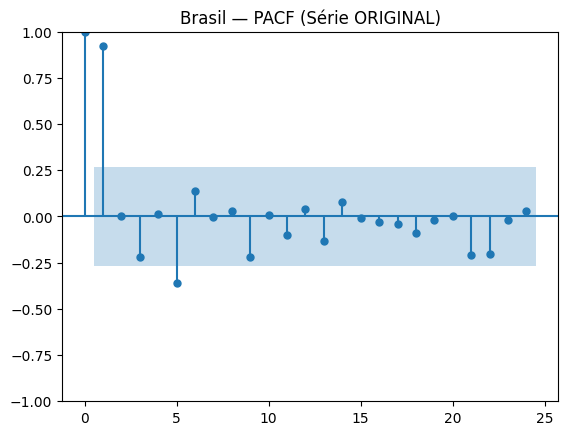

<Figure size 640x480 with 0 Axes>

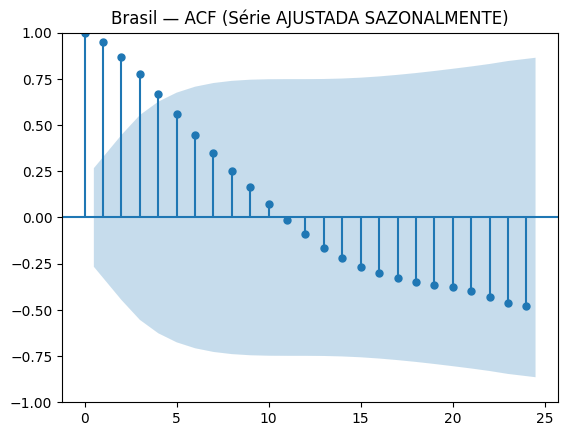

<Figure size 640x480 with 0 Axes>

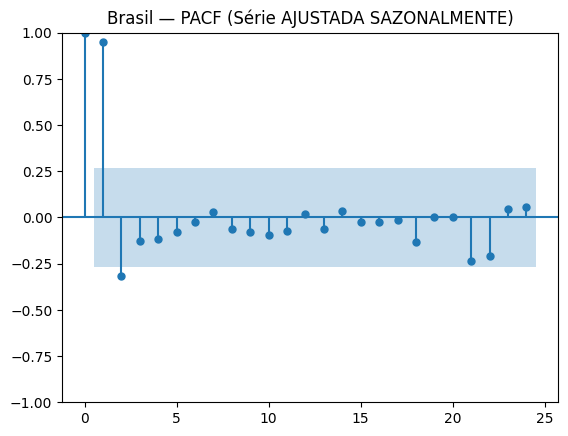

In [ ]:
# Comparação ACF/PACF — Série original vs. Ajustada sazonalmente (Brasil)
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

dfB = globals().get("df_brasil")
if dfB is None:
    raise NameError("Não encontrei df_brasil")

dfB = dfB.copy().sort_values("data")
dfB["data"]  = pd.to_datetime(dfB["data"], errors="coerce")
dfB["valor"] = pd.to_numeric(dfB["valor"], errors="coerce")

# Série ORIGINAL
s_orig = dfB["valor"].dropna()
lags_o = min(24, max(2, len(s_orig) - 2))

plt.figure()
plot_acf(s_orig, lags=lags_o, title="Brasil — ACF (Série ORIGINAL)")
plt.show()

plt.figure()
plot_pacf(s_orig, lags=lags_o, method="ywm", title="Brasil — PACF (Série ORIGINAL)")
plt.show()

# Série AJUSTADA SAZONALMENTE

s_adj = dfB["valor_aj_sazonal"].dropna()
lags_a = min(24, max(2, len(s_adj) - 2))

plt.figure()
plot_acf(s_adj, lags=lags_a, title="Brasil — ACF (Série AJUSTADA SAZONALMENTE)")
plt.show()

plt.figure()
plot_pacf(s_adj, lags=lags_a, method="ywm", title="Brasil — PACF (Série AJUSTADA SAZONALMENTE)")
plt.show()


## Comparação entre UFs

Top-5 UFs — maiores médias da taxa de desocupação (2012–2025):


,local,media_%
4,Bahia,14.52
2,Amapá,13.84
16,Pernambuco,13.50
1,Alagoas,13.02
24,Sergipe,12.78


Bottom-5 UFs — menores médias da taxa de desocupação (2012–2025):


,local,media_%
23,Santa Catarina,4.66
10,Mato Grosso,6.23
21,Rondônia,6.33
11,Mato Grosso do Sul,6.39
13,Paraná,6.53


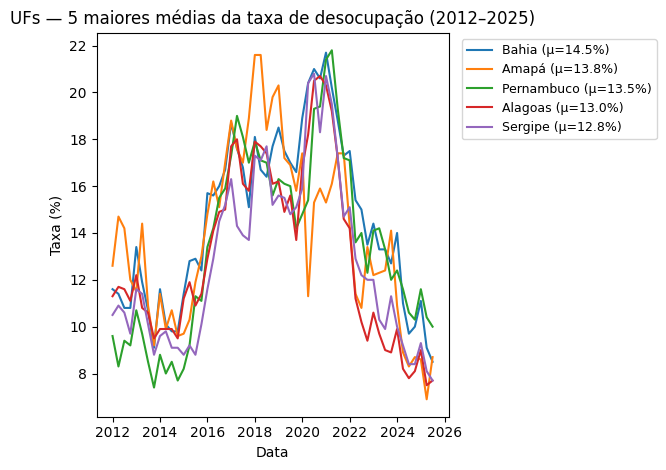

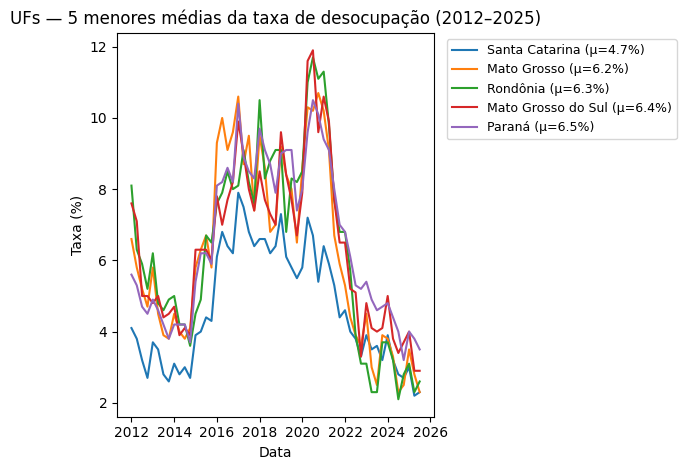

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Garante que estamos usando o mesmo DF de UFs já padronizado
dfU = globals().get("df_uf_qc", globals().get("df_uf"))
if dfU is None:
    raise NameError("Não encontrei df_uf/df_uf_qc. Execute as etapas anteriores.")

dfU = dfU.copy()
dfU["data"]  = pd.to_datetime(dfU.get("data", pd.NaT), errors="coerce")
dfU["valor"] = pd.to_numeric(dfU["valor"], errors="coerce")
dfU = dfU.dropna(subset=["valor", "data", "local"])

# ===========================
# 1) Médias por UF
# ===========================
uf_means = (
    dfU.groupby("local", as_index=False)["valor"]
       .mean()
       .dropna(subset=["valor"])
       .rename(columns={"valor": "media"})
)

# Top-5 maiores médias
top5 = uf_means.sort_values("media", ascending=False).head(5)

# Bottom-5 menores médias
bottom5 = uf_means.sort_values("media", ascending=True).head(5)

print("Top-5 UFs — maiores médias da taxa de desocupação (2012–2025):")
display(top5.assign(media=lambda d: d["media"].round(2))
           .rename(columns={"media": "media_%"}))

print("Bottom-5 UFs — menores médias da taxa de desocupação (2012–2025):")
display(bottom5.assign(media=lambda d: d["media"].round(2))
              .rename(columns={"media": "media_%"}))

# ===========================
# 2) Função auxiliar de plot
# ===========================
def plot_ufs_por_media(dfU, uf_lista, titulo):
    gdf = (
        dfU[dfU["local"].isin(uf_lista)]
           .dropna(subset=["valor", "data"])
           .sort_values("data")
    )

    plt.figure()
    for uf in uf_lista:
        s = gdf[gdf["local"] == uf]
        if s.empty:
            continue
        plt.plot(
            s["data"],
            s["valor"],
            label=f"{uf} (μ={s['valor'].mean():.1f}%)"
        )

    plt.title(titulo)
    plt.xlabel("Data")
    plt.ylabel("Taxa (%)")
    plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=9)
    plt.tight_layout()
    plt.show()

# ===========================
# 3) Séries das UFs com maiores/menores médias
# ===========================

# Top-5 (maiores médias)
top5_ordenadas = (
    top5.sort_values("media", ascending=False)["local"].tolist()
)
plot_ufs_por_media(
    dfU,
    top5_ordenadas,
    "UFs — 5 maiores médias da taxa de desocupação (2012–2025)"
)

# Bottom-5 (menores médias)
bottom5_ordenadas = (
    bottom5.sort_values("media", ascending=True)["local"].tolist()
)
plot_ufs_por_media(
    dfU,
    bottom5_ordenadas,
    "UFs — 5 menores médias da taxa de desocupação (2012–2025)"
)

## Executando os modelos para a UF com maior média e para a UF com menor média da taxa de desocupação

UF com MAIOR média de desocupação (2012–2025): Bahia
UF com MENOR média de desocupação (2012–2025): Santa Catarina


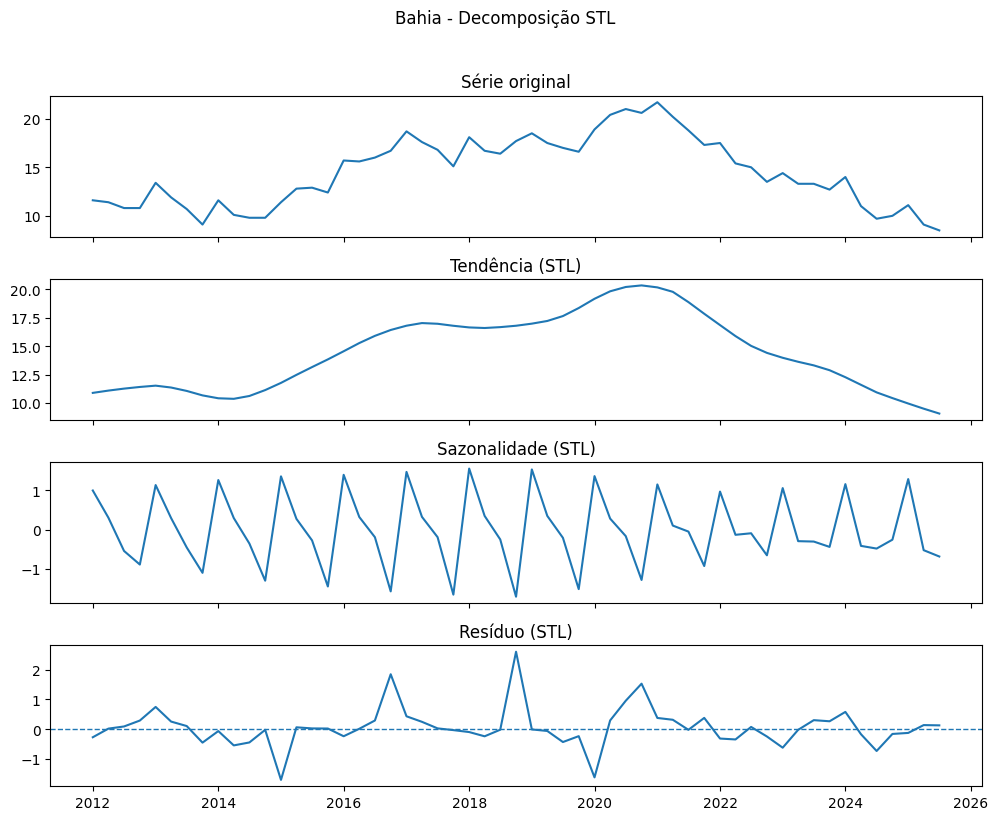

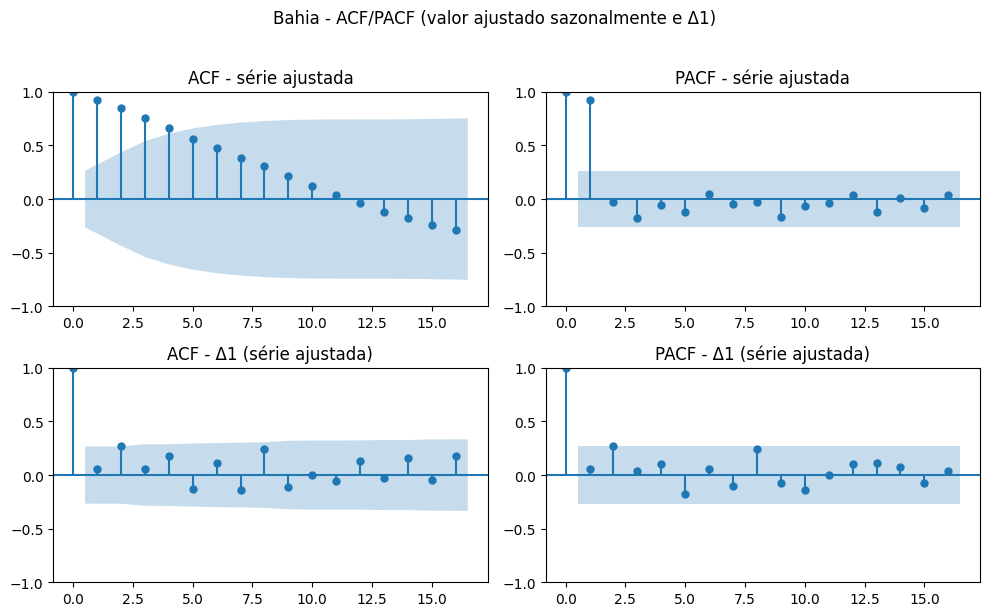

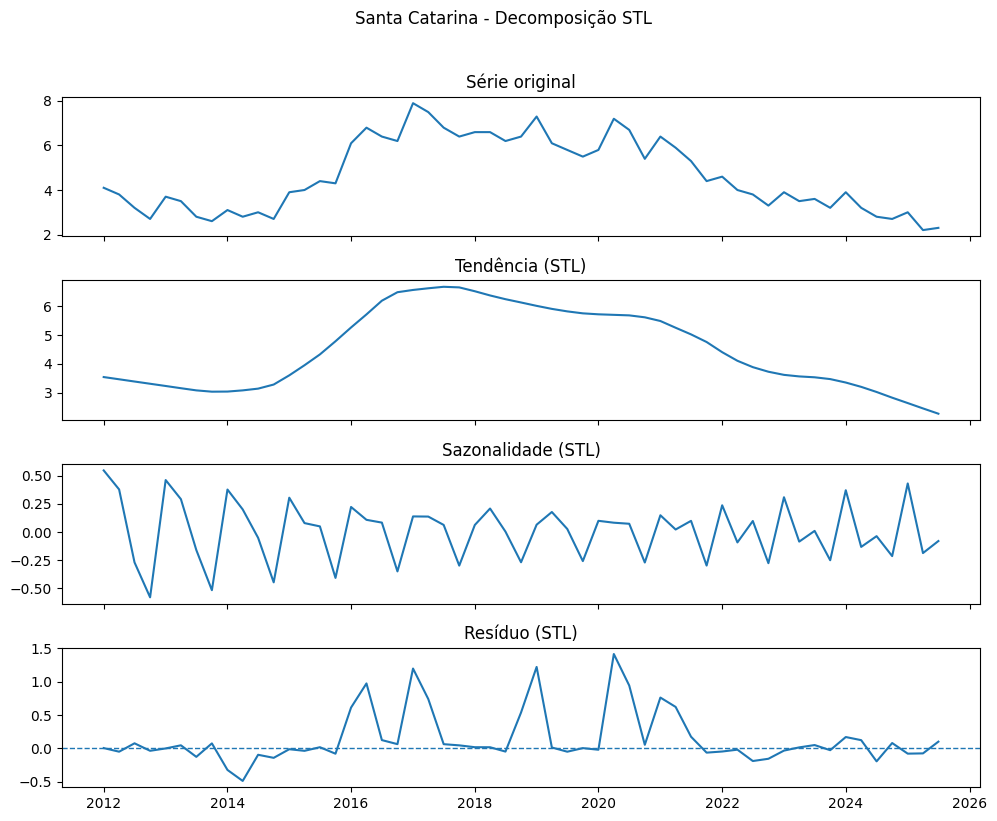

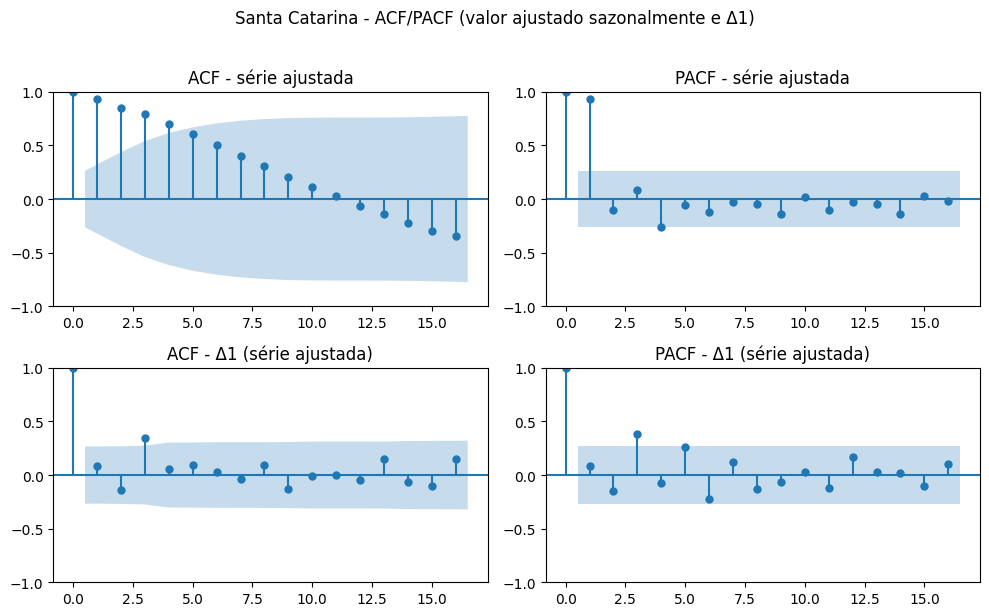

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ============================================================
# 1) Recupera o DataFrame base de UFs já padronizado
# ============================================================
dfU = globals().get("df_uf_qc", globals().get("df_uf"))
if dfU is None:
    raise NameError("Não encontrei df_uf/df_uf_qc. Execute as etapas anteriores.")

dfU = dfU.copy()
dfU["data"]  = pd.to_datetime(dfU.get("data", pd.NaT), errors="coerce")
dfU["valor"] = pd.to_numeric(dfU["valor"], errors="coerce")
dfU = dfU.dropna(subset=["valor", "data", "local"])

# ============================================================
# 2) Encontra UF com MAIOR e MENOR média de desocupação
# ============================================================
uf_means = (
    dfU.groupby("local", as_index=False)["valor"]
       .mean()
       .dropna(subset=["valor"])
       .rename(columns={"valor": "media"})
)

uf_maior = uf_means.sort_values("media", ascending=False).iloc[0]["local"]
uf_menor = uf_means.sort_values("media", ascending=True).iloc[0]["local"]

print("UF com MAIOR média de desocupação (2012–2025):", uf_maior)
print("UF com MENOR média de desocupação (2012–2025):", uf_menor)

# ============================================================
# 3) Função: STL + ACF/PACF para uma UF
# ============================================================
def stl_e_acf_pacf_uf(dfU, uf_nome, period=4, max_lag=16):
    # Filtra e ordena a série da UF
    dados_uf = (
        dfU[dfU["local"] == uf_nome]
        .dropna(subset=["valor", "data"])
        .sort_values("data")
    )

    serie = pd.Series(dados_uf["valor"].values, index=dados_uf["data"])

    # ---------------- STL ----------------
    stl = STL(serie, period=period, robust=True)
    res = stl.fit()
    serie_aj = serie - res.seasonal  # série ajustada sazonalmente

    # Guarda componentes em DataFrame
    out = dados_uf.copy()
    out["stl_trend"]        = res.trend
    out["stl_season"]       = res.seasonal
    out["stl_resid"]        = res.resid
    out["valor_aj_sazonal"] = serie_aj.values

    # ---------------- Plot STL ----------------
    fig_stl, axes_stl = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
    fig_stl.suptitle(f"{uf_nome} - Decomposição STL", y=1.02)

    axes_stl[0].plot(serie.index, serie.values)
    axes_stl[0].set_title("Série original")

    axes_stl[1].plot(serie.index, res.trend)
    axes_stl[1].set_title("Tendência (STL)")

    axes_stl[2].plot(serie.index, res.seasonal)
    axes_stl[2].set_title("Sazonalidade (STL)")

    axes_stl[3].plot(serie.index, res.resid)
    axes_stl[3].axhline(0, linestyle="--", linewidth=1)
    axes_stl[3].set_title("Resíduo (STL)")

    plt.tight_layout()
    plt.show()

    # ---------------- Diferença de 1ª ordem ----------------
    serie_aj_diff1 = serie_aj.diff().dropna()

    # ---------------- Plots ACF / PACF ----------------
    fig, axes = plt.subplots(2, 2, figsize=(10, 6))
    fig.suptitle(f"{uf_nome} - ACF/PACF (valor ajustado sazonalmente e Δ1)", y=1.02)

    # ACF da série ajustada
    plot_acf(serie_aj, lags=max_lag, ax=axes[0, 0])
    axes[0, 0].set_title("ACF - série ajustada")

    # PACF da série ajustada
    plot_pacf(serie_aj, lags=max_lag, ax=axes[0, 1], method="ywm")
    axes[0, 1].set_title("PACF - série ajustada")

    # ACF da primeira diferença
    plot_acf(serie_aj_diff1, lags=max_lag, ax=axes[1, 0])
    axes[1, 0].set_title("ACF - Δ1 (série ajustada)")

    # PACF da primeira diferença
    plot_pacf(serie_aj_diff1, lags=max_lag, ax=axes[1, 1], method="ywm")
    axes[1, 1].set_title("PACF - Δ1 (série ajustada)")

    plt.tight_layout()
    plt.show()

    return out, res, serie_aj, serie_aj_diff1

# ============================================================
# 4) Rodando para UF com MAIOR e MENOR média
# ============================================================
df_stl_acf_maior, res_maior, serie_aj_maior, serie_aj_diff1_maior = stl_e_acf_pacf_uf(
    dfU, uf_maior, period=4, max_lag=16
)

df_stl_acf_menor, res_menor, serie_aj_menor, serie_aj_diff1_menor = stl_e_acf_pacf_uf(
    dfU, uf_menor, period=4, max_lag=16
)


# **Resultados**

Apresentr os resultados obtidos, métricas, tabelas comparativas, etc.

# **Dicussão e Conclusão**

# **Apresentação**

Colocar os links dos vídeos.

# **Referências**

Complementar a entrega anterior.




In [ ]:
#@title **Avaliação**
Metodologia = 10 #@param {type:"slider", min:0, max:10, step:1}

Resultado = 10 #@param {type:"slider", min:0, max:10, step:1}

Conclusao = 10 #@param {type:"slider", min:0, max:10, step:1}

Artigo = 10 #@param {type:"slider", min:0, max:10, step:1}

Apresentacao = 10 #@param {type:"slider", min:0, max:10, step:1}

In [ ]:
#@title **Nota Final**
nota = 0.25*Metodologia + 0.15*Resultado + 0.10*Conclusao + 0.25*Artigo + 0.25*Apresentacao

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_nome.append(lista[0]);")

alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 10.0



,nome,nota
0,Aluno 1,10.0
1,Aluno 2,10.0
2,Aluno 3,10.0
3,Aluno 4,10.0
4,Aluno 5,10.0
